In [9]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from scipy import stats as st

from sklearn import metrics 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import ensemble  # pakiet z lasami decyzyjnymi
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn import ensemble
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from mlxtend import plotting
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
import pickle


plt.rcParams["figure.figsize"] = (20,6)
%matplotlib inline

In [11]:
df = pd.read_csv("survey_final.csv")

C:\Users\siedl\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [12]:
def clean_string_entries(df):
    df["EdLevel"].replace({
        "Associate degree (A.A., A.S., etc.)":"Associate degree",
        "Bachelor's degree (B.A., B.S., B.Eng., etc.":"Bachelor's degree",
        "Bachelor's degree (BA, BS, B.Eng., etc.)":"Bachelor's degree",
        "Bachelor‚'s degree (BA, BS, B.Eng., etc.)":"Bachelor's degree",
        "Bachelor's degree (B.A., B.S., B.Eng., etc.)":"Bachelor's degree",
        "Master's degree (M.A., M.S., M.Eng., MBA, etc.)":"Master's degree",
        "Master's degree (MA, MS, M.Eng., MBA, etc.)":"Master's degree",
        "Master‚'s degree (MA, MS, M.Eng., MBA, etc.)":"Master's degree",
        "Other doctoral degree (Ph.D, Ed.D., etc.)":"Doctoral degree",
        "Other doctoral degree (Ph.D., Ed.D., etc.)":"Doctoral degree",
        "Professional degree (JD, MD, etc.)":"Professional degree",
        "Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)":"Secondary school",
        "Some college/university study without earning a bachelor's degree":"Some college/university study without earning a degree"
        }, inplace=True)
    df["Hobbyist"].replace({
        "Yes, I contribute to open source projects":"Yes",
        "Yes, I program as a hobby":"Yes",
        "Yes, both":"Yes"}, inplace=True)
    df["Country"].replace({
        "Azerbaidjan":"A`zerbaijan",
        "Bosnia-Herzegovina":"Bosnia and Herzegovina",
        "CÃ´te d'Ivoire":"Ivory Coast",
        "C√¥te d'Ivoire":"Ivory Coast",
        "Hong Kong (S.A.R.)":"Hong Kong",
        "Iran, Islamic Republic of...":"Iran",
        "Lao People's Democratic Republic":"Laos",
        "Libyan Arab Jamahiriya":"Libia",
        "Republic of Korea":"Korea",
        "South Korea":"Korea",
        "Saint Vincent & Grenadines":"Saint Vincent and the Grenadines",
        "Slovak Republic":"Slovakia",
        "Syrian Arab Republic":"Syria",
        "Tadjikistan":"Tajikistan",
        "United Republic of Tanzania":"Tanzania",
        "Venezuela, Bolivarian Republic of...":"Venezuela",
        "Viet Nam":"Vietnam",
        "Congo, Republic of the...":"Congo",
        "Ivory Coast (Cote D'Ivoire)":"Ivory Coast"
        }, inplace=True)
    df["OrgSize"].replace({"2-9 employees":"Fewer than 10 employees", 
        "2 to 9 employees":"Fewer than 10 employees", 
        "Just me - I am a freelancer, sole proprietor, etc.":"1 - freelancer, sole prioprietor, etc.",
        np.NaN: 'Fewer than 10 employees'
        }, inplace=True)
    df["Employment"].replace({
        'Retired' : 'not employed',
        'Not employed, and not looking for work' : 'not employed',
        'Not employed, but looking for work': 'not employed',
        }, inplace=True)
    df["JobSat"] = df["JobSat"].astype(str)
    df["JobSat"].replace({
        'Extremely dissatisfied': '1',
        'Very dissatisfied': '1',
        'Moderately dissatisfied': '1',
        '0.0': '1',
        '1.0': '1',
        '2.0': '1',
        '3.0': '1',
        'Slightly dissatisfied': '2',
        'Neither satisfied nor dissatisfied': '2',
        'Slightly satisfied': '2',
        '4.0': '2',
        '5.0': '2',
        '6.0': '2',
        'Moderately satisfied': '3',
        'Very satisfied': '3',
        'Extremely satisfied': '3',
        '7.0': '3',
        '8.0': '3',
        '9.0': '3',
        '10.0': '3',
        'nan': '2',
        np.NaN: '2'
        }, inplace=True)
    df['YearsCodePro'].replace({
        '0-2 years': '2',
        '1 to 2 years' : '2',
        '10 to 11 years' : '11',
        '11 to 12 years' : '12',
        '12 to 13 years' : '13',
        '12-14 years' : '13',
        '13 to 14 years' : '14',
        '14 to 15 years' : '15',
        '15 to 16 years' : '16',
        '15-17 years' : '16',
        '16 to 17 years' : '17',
        '17 to 18 years' : '18',
        '18 to 19 years' : '19',
        '18-20 years' : '19',
        '19 to 20 years' : '20',
        '2 to 3 years' : '3',
        '20 or more years' : '20',
        '21-23 years' : '22',
        '24-26 years' : '25',
        '27-29 years' : '28',
        '3 to 4 years' : '4',
        '30 or more years' : '30',
        '3-5 years' : '4',
        '4 to 5 years' : '5',
        '5 to 6 years' : '6',
        '6 to 7 years' : '7',
        '6-8 years' : '7',
        '7 to 8 years' : '8',
        '8 to 9 years' : '9',
        '9 to 10 years' : '10',
        '9-11 years' : '10',
        'Less than 1 year' : '1',
        'Less than a year' : '1',
        'More than 50 years' : '50',
        np.NaN: '0'
    }, inplace=True)
    df["EdLevel"].replace({
    "Associate degree (A.A., A.S., etc.)":"Associate degree",
    "Bachelor's degree (B.A., B.S., B.Eng., etc.":"Bachelor's degree",
    "Bachelor's degree (BA, BS, B.Eng., etc.)":"Bachelor's degree",
    "Bachelor‚'s degree (BA, BS, B.Eng., etc.)":"Bachelor's degree",
    "Bachelor's degree (B.A., B.S., B.Eng., etc.)":"Bachelor's degree",
    "Master's degree (M.A., M.S., M.Eng., MBA, etc.)":"Master's degree",
    "Master's degree (MA, MS, M.Eng., MBA, etc.)":"Master's degree",
    "Master‚'s degree (MA, MS, M.Eng., MBA, etc.)":"Master's degree",
    "Other doctoral degree (Ph.D, Ed.D., etc.)":"Doctoral degree",
    "Other doctoral degree (Ph.D., Ed.D., etc.)":"Doctoral degree",
    "Professional degree (JD, MD, etc.)":"Professional degree",
    "Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)":"Secondary school",
    "Some college/university study without earning a bachelor's degree":"Some college/university study without earning a degree"
    }, inplace=True)

    return df

def split_dev_type(df):
    d = df["DevType"].str.get_dummies(sep=";")
    
    d["Academic, educator, researcher"] = d["Scientist"] + d["Academic researcher"] +  d["Educator or academic researcher"] + d["Educator"] 
    d["Data scientist or ML"] = d["Data scientist"] + d["Data scientist or machine learning specialist"] + d[" Data scientist"] + d["Engineer, data"] + d["Data or business analyst"] + d["Machine learning specialist"]+ d[" Machine learning specialist"] 
    d["Database admin"]= d[" Database administrator"] + d["Database administrator"]
    d["Desktop app dev"]= d[" Desktop applications developer"] + d["Developer, desktop or enterprise applications"] + d["Desktop applications developer"] + d["Desktop or enterprise applications developer"]
    d["System admin"]=d["Systems administrator"] + d["System administrator"]+ d[" Systems administrator"]
    d["Developer with stat"] = d[" Developer with a statistics or mathematics background"]+ d["Developer with a statistics or mathematics background"]
    d["Back-end dev"] = d["Back-end developer"] + d["Developer, back-end"]
    d["Graphic design"]=d[" Graphics programming"] + d["Graphics programming"] + d[" Graphic designer"] + d["Graphic designer"] + d["Designer"]
    d["Front-end dev"] = d["Front-end developer"] + d["Developer, front-end"]
    d["Full-stack dev"] = d["Full-stack developer"] + d["Developer, full-stack"]
    d["Game/graphics dev"] = d["Game or graphics developer"]+d["Developer, game or graphics"]
    d["QA/test eng"] = d["QA or test developer"] + d["Developer, QA or test"] + d["Quality assurance engineer"] + d[" Quality assurance engineer"]
    d["Mobile dev"] = d[" Mobile developer"] + d["Developer, mobile"] + d["Mobile developer"]
    d["DevOps"] =  d[" DevOps specialist"] + d["DevOps specialist"]
    d["Embedded Developer"]=d["Embedded applications/devices developer"]+d[" Embedded applications/devices developer"]+d["Embedded applications or devices developer"] +d["Developer, embedded applications or devices"]
    d["Other dev"] = d[" Other"] + d["Other"]
    d["CEO, CTO, etc"] = d["C-suite executive (CEO, CTO, etc.)"]
    d["Engineer of site reliability"] = d["Engineer, site reliability"]
    d["Engineering Manager"] = d["Engineering manager"]
    d["Marketing or sales Professional"] = d["Marketing or sales professional"]
    d["Product Manager"] = d["Product manager"]
    d["Senior Executive/VP"] = d["Senior executive/VP"]
    d["Students"] = d["Student"]
    d["Web developers"] = d["Web developer"]
    
    d[['Academic, educator, researcher','Data scientist or ML','Database admin','Desktop app dev',
         'System admin','Developer with stat','Back-end dev','Graphic design','Front-end dev','Full-stack dev',
         'Game/graphics dev','QA/test eng','Mobile dev','DevOps','Embedded Developer','Other dev','CEO, CTO, etc',
         'Engineer of site reliability','Engineering Manager','Marketing or sales Professional','Product Manager',
         'Senior Executive/VP','Students','Web developers',
]].replace({
    2:1,
    3:1,
    4:1,
    5:1,
    6:1,
    7:1,
    8:1,
    9:1,
    10:1})

    d1 = d.loc[:, 'Academic, educator, researcher':'Web developers']
    df_result = pd.concat([df, d1], axis=1)
    df_result = df_result.drop(columns=["DevType"], axis=1)
    return df_result

def split_db_worked_with(df):
    d_DatabaseWorkedWith = df["DatabaseWorkedWith"].str.get_dummies(sep=";")

    d_DatabaseWorkedWith["MongoDB_1"] = d_DatabaseWorkedWith[" MongoDB"] + d_DatabaseWorkedWith["MongoDB"]
    d_DatabaseWorkedWith["MySQL_1"] = d_DatabaseWorkedWith[" MySQL"] + d_DatabaseWorkedWith["MySQL"]
    d_DatabaseWorkedWith["Oracle_1"] = d_DatabaseWorkedWith[" Oracle"] + d_DatabaseWorkedWith["Oracle"]
    d_DatabaseWorkedWith["PostgreSQL_1"] = d_DatabaseWorkedWith[" PostgreSQL"] + d_DatabaseWorkedWith["PostgreSQL"]
    d_DatabaseWorkedWith["Redis_1"] = d_DatabaseWorkedWith[" Redis"] + d_DatabaseWorkedWith["Redis"]
    d_DatabaseWorkedWith["Microsoft_SQL_Server_1"] = d_DatabaseWorkedWith[" SQL Server"] + d_DatabaseWorkedWith["SQL Server"] + d_DatabaseWorkedWith["Microsoft SQL Server"]
    d_DatabaseWorkedWith["SQLite_1"] = d_DatabaseWorkedWith[" SQLite"] + d_DatabaseWorkedWith["SQLite"]
    d_DatabaseWorkedWith["Amazon_DynamoDB_1"] = d_DatabaseWorkedWith["Amazon DynamoDB"] + d_DatabaseWorkedWith["DynamoDB"]
    d_DatabaseWorkedWith["IBM_DB2_1"] = d_DatabaseWorkedWith["IBM DB2"] + d_DatabaseWorkedWith["IBM Db2"]
    d_DatabaseWorkedWith["MariaDB_1"] = d_DatabaseWorkedWith["MariaDB"]
    d_DatabaseWorkedWith["Amazon_RDS/Aurora_1"] = d_DatabaseWorkedWith["Amazon RDS/Aurora"]
    d_DatabaseWorkedWith["Amazon_Redshift_1"] = d_DatabaseWorkedWith["Amazon Redshift"]
    d_DatabaseWorkedWith["Apache_HBase_1"] = d_DatabaseWorkedWith["Apache HBase"]
    d_DatabaseWorkedWith["Apache_Hive_1"] = d_DatabaseWorkedWith["Apache Hive"]
    d_DatabaseWorkedWith["Cassandra_1"] = d_DatabaseWorkedWith["Cassandra"]
    d_DatabaseWorkedWith["Couchbase1"] = d_DatabaseWorkedWith["Couchbase"]
    d_DatabaseWorkedWith["Elasticseach_1"] = d_DatabaseWorkedWith["Elasticsearch"]
    d_DatabaseWorkedWith["Firebase_1"] = d_DatabaseWorkedWith["Firebase"]
    d_DatabaseWorkedWith["Google_BigQuery_1"] = d_DatabaseWorkedWith["Google BigQuery"]
    d_DatabaseWorkedWith["Google_Cloud_Storage_1"] = d_DatabaseWorkedWith["Google Cloud Storage"]
    d_DatabaseWorkedWith["Memcached_1"] = d_DatabaseWorkedWith["Memcached"]
    d_DatabaseWorkedWith["Microsoft_Azure_(Tables, CosmosDB, SQL, etc)_1"] = d_DatabaseWorkedWith["Microsoft Azure (Tables, CosmosDB, SQL, etc)"]
    d_DatabaseWorkedWith["Neo4j_1"] = d_DatabaseWorkedWith["Neo4j"]
    d_DatabaseWorkedWith["Other_1"] = d_DatabaseWorkedWith["Other(s):"]
    
    d_DatabaseWorkedWith[['MySQL_1','Microsoft_SQL_Server_1','PostgreSQL_1','MongoDB_1','SQLite_1',
                            'Redis_1','Elasticseach_1','MariaDB_1','Oracle_1','Firebase_1','Amazon_DynamoDB_1',
                            'Cassandra_1','Other_1','Microsoft_Azure_(Tables, CosmosDB, SQL, etc)_1','Memcached_1',
                            'Amazon_RDS/Aurora_1','Google_Cloud_Storage_1','IBM_DB2_1','Couchbase1','Amazon_Redshift_1',
                            'Neo4j_1','Google_BigQuery_1','Apache_Hive_1','Apache_HBase_1',
    ]].replace({
        2:1,
        3:1,
        4:1,
        5:1,
        6:1,
        7:1,
        8:1,
        9:1,
        10:1})

    d_DatabaseWorkedWith = d_DatabaseWorkedWith.loc[:, "MongoDB_1":"Other_1" ]
    df_result = pd.concat([df, d_DatabaseWorkedWith], axis=1)
    df_result = df_result.drop(columns=["DatabaseWorkedWith"], axis=1)
    return df_result

def split_language_worked_with(df):
    d4 = df["LanguageWorkedWith"].str.get_dummies(sep=";")

    d4["C++_lang"] = d4[" C"] + d4[" C#"] + d4[" C++"]+d4["C"]+d4["C#"]+d4["C++"]
    d4["Common_Lisp_lang"] = d4["Common Lisp"]
    d4["Clojure_lang"] = d4[" Clojure"] + d4["Clojure"]
    d4["CoffeeScript_lang"] = d4[" CoffeeScript"]+d4["CoffeeScript"]
    d4["Dart_lang"] = d4[" Dart"]+d4["Dart"]
    d4["Elixir_lang"] = d4[" Elixir"]+d4["Elixir"]
    d4["Erlang_lang"] = d4[" Erlang"]+d4["Erlang"]
    d4["F#_lang"] = d4[" F#"]+d4["F#"]
    d4["Go_lang"] = d4[" Go"]+d4["Go"]
    d4["Groovy_lang"] = d4[" Groovy"]+d4["Groovy"]
    d4["Hack_lang"] = d4[" Hack"]+d4["Hack"]
    d4["Haskell_lang"] = d4[" Haskell"]+d4["Haskell"]
    d4["Java_lang"] = d4[" Java"]+d4["Java"]
    d4["JavaScript_lang"] = d4[" JavaScript"]+d4["JavaScript"]
    d4["Julia_lang"] = d4[" Julia"]+d4["Julia"]
    d4["Lua_lang"] = d4[" Lua"]+d4["Lua"]
    d4["Matlab_lang"] = d4[" Matlab"]+d4["Matlab"]
    d4["Objective-C_lang"] = d4[" Objective-C"]+d4["Objective-C"]
    d4["Perl_lang"] = d4[" Perl"]+d4["Perl"]
    d4["PHP_lang"] = d4[" PHP"]+d4["PHP"]
    d4["Python_lang"] = d4[" Python"]+d4["Python"]
    d4["R_lang"] = d4[" R"]+d4["R"]
    d4["Ruby_lang"]=d4[" Ruby"]+d4["Ruby"]
    d4["Rust_lang"] = d4[" Rust"]+d4["Rust"]
    d4["Scala_lang"] = d4[" Scala"]+d4["Scala"]
    d4["Smalltalk_lang"] = d4[" Smalltalk"]+d4["Smalltalk"]
    d4["SQL_lang"] = d4[" SQL"]+d4["SQL"]
    d4["Swift_lang"] = d4[" Swift"]+d4["Swift"]
    d4["TypeScript_lang"] = d4[" TypeScript"]+d4["TypeScript"]
    d4["VB.NET_lang"] = d4[" VB.NET"]+d4["VB.NET"]
    d4["VBA_lang"] = d4[" VBA"]+d4["VBA"]+d4["Visual Basic 6"]+d4[" Visual Basic 6"]
    d4["WebAssembly_lang"] = d4["Assembly"]+d4["WebAssembly"]
    d4["Cobol_lang"] = d4["Cobol"]
    d4["Delphi/Object_Pascal_lang"] = d4["Delphi/Object Pascal"]
    d4["HTML/CSS_lang"] = d4["HTML"]+d4["HTML/CSS"]+d4["CSS"]
    d4["Kotlin_lang"] = d4["Kotlin"]
    d4["Bash/Shell/PowerShell_lang"] = d4["Bash/Shell/PowerShell"]+d4["Bash/Shell"]
    d4["Ocaml_lang"] = d4["Ocaml"]
    d4["Other_lang"] = d4["Other(s):"]
    
    d4[['HTML/CSS_lang','C++_lang','JavaScript_lang','SQL_lang','Python_lang','Java_lang','Bash/Shell/PowerShell_lang',
    'PHP_lang','TypeScript_lang','Ruby_lang','Go_lang','Swift_lang','VBA_lang','R_lang','Kotlin_lang','Objective-C_lang',
    'WebAssembly_lang','Scala_lang','Rust_lang','Other_lang','Perl_lang','VB.NET_lang','Groovy_lang','Matlab_lang',
    'Haskell_lang','F#_lang','Dart_lang','Clojure_lang','CoffeeScript_lang','Lua_lang','Elixir_lang','Erlang_lang',
    'Delphi/Object_Pascal_lang','Julia_lang','Cobol_lang','Ocaml_lang','Hack_lang','Smalltalk_lang','Common_Lisp_lang']].replace({
    2:1,
    3:1,
    4:1,
    5:1,
    6:1,
    7:1,
    8:1,
    9:1,
    10:1})

    d4 = d4.loc[:, 'C++_lang':'Other_lang']
    df_result = pd.concat([df, d4], axis=1)
    df_result = df_result.drop(columns=["LanguageWorkedWith"], axis=1)
    return df_result

def split_hobbyist(df):
    df_result = pd.get_dummies(df, columns=['Hobbyist', 'Employment', 'OrgSize'], drop_first=True)
    return df_result

def clean_data(df):
    df2 = df.dropna(subset = ["ConvertedComp"])
    df3 = clean_string_entries(df2)
    df4 = df3.drop(["DatabaseDesireNextYear","LanguageDesireNextYear", "UndergradMajor", 'Country', 'EdLevel'], axis=1)
    df5 = split_language_worked_with(df4)
    df6 = split_db_worked_with(df5)
    df7 = split_dev_type(df6)
    df8 = split_hobbyist(df7)
    df8['YearsCodePro'] = df8['YearsCodePro'].astype('int')
    df8['JobSat'] = df8['JobSat'].astype('int')
    
    return df8

In [13]:
df2 = clean_data(df)

C:\Users\siedl\anaconda3\lib\site-packages\pandas\core\series.py:4563: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(
<ipython-input-12-cb36681dfe09>:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["JobSat"] = df["JobSat"].astype(str)


In [14]:
for col_name in df2.columns: 
    print(col_name)

Year
ConvertedComp
JobSat
YearsCodePro
C++_lang
Common_Lisp_lang
Clojure_lang
CoffeeScript_lang
Dart_lang
Elixir_lang
Erlang_lang
F#_lang
Go_lang
Groovy_lang
Hack_lang
Haskell_lang
Java_lang
JavaScript_lang
Julia_lang
Lua_lang
Matlab_lang
Objective-C_lang
Perl_lang
PHP_lang
Python_lang
R_lang
Ruby_lang
Rust_lang
Scala_lang
Smalltalk_lang
SQL_lang
Swift_lang
TypeScript_lang
VB.NET_lang
VBA_lang
WebAssembly_lang
Cobol_lang
Delphi/Object_Pascal_lang
HTML/CSS_lang
Kotlin_lang
Bash/Shell/PowerShell_lang
Ocaml_lang
Other_lang
MongoDB_1
MySQL_1
Oracle_1
PostgreSQL_1
Redis_1
Microsoft_SQL_Server_1
SQLite_1
Amazon_DynamoDB_1
IBM_DB2_1
MariaDB_1
Amazon_RDS/Aurora_1
Amazon_Redshift_1
Apache_HBase_1
Apache_Hive_1
Cassandra_1
Couchbase1
Elasticseach_1
Firebase_1
Google_BigQuery_1
Google_Cloud_Storage_1
Memcached_1
Microsoft_Azure_(Tables, CosmosDB, SQL, etc)_1
Neo4j_1
Other_1
Academic, educator, researcher
Data scientist or ML
Database admin
Desktop app dev
System admin
Developer with stat
Back-end

In [16]:
X = df2[['Year','JobSat','YearsCodePro','C++_lang','Common_Lisp_lang','Clojure_lang','CoffeeScript_lang','Dart_lang',
         'Elixir_lang','Erlang_lang','F#_lang','Go_lang','Groovy_lang','Hack_lang','Haskell_lang','Java_lang',
         'JavaScript_lang','Julia_lang','Lua_lang','Matlab_lang','Objective-C_lang','Perl_lang','PHP_lang','Python_lang',
         'R_lang','Ruby_lang','Rust_lang','Scala_lang','Smalltalk_lang','SQL_lang','Swift_lang','TypeScript_lang',
         'VB.NET_lang','VBA_lang','WebAssembly_lang','Cobol_lang','Delphi/Object_Pascal_lang','HTML/CSS_lang',
         'Kotlin_lang','Bash/Shell/PowerShell_lang','Ocaml_lang','Other_lang','MongoDB_1','MySQL_1','Oracle_1','PostgreSQL_1',
         'Redis_1','Microsoft_SQL_Server_1','SQLite_1','Amazon_DynamoDB_1','IBM_DB2_1','MariaDB_1','Amazon_RDS/Aurora_1',
         'Amazon_Redshift_1','Apache_HBase_1','Apache_Hive_1','Cassandra_1','Couchbase1','Elasticseach_1','Firebase_1',
         'Google_BigQuery_1','Google_Cloud_Storage_1','Memcached_1','Microsoft_Azure_(Tables, CosmosDB, SQL, etc)_1',
         'Neo4j_1','Other_1','Academic, educator, researcher','Data scientist or ML','Database admin','Desktop app dev',
         'System admin','Developer with stat','Back-end dev','Graphic design','Front-end dev','Full-stack dev',
         'Game/graphics dev','QA/test eng','Mobile dev','DevOps','Embedded Developer','Other dev','CEO, CTO, etc',
         'Engineer of site reliability','Engineering Manager','Marketing or sales Professional','Product Manager',
         'Senior Executive/VP','Students','Web developers','Hobbyist_Yes','Employment_Employed part-time',
         'Employment_Independent contractor, freelancer, or self-employed','Employment_not employed',
         'OrgSize_1,000 to 4,999 employees','OrgSize_10 to 19 employees','OrgSize_10,000 or more employees',
         'OrgSize_100 to 499 employees','OrgSize_20 to 99 employees','OrgSize_5,000 to 9,999 employees',
         'OrgSize_500 to 999 employees','OrgSize_Fewer than 10 employees','OrgSize_I don\'t know',
         'OrgSize_I prefer not to answer']]

In [17]:
Y = df2['ConvertedComp']

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)

In [36]:
xg_reg = xgb.XGBRegressor(n_estimators=150, max_depth=15, eta=0.1, booster='gbtree')
xg_reg.fit(X_train, Y_train)
xg_reg.score(X_train, Y_train)

0.8806600014643329

In [44]:
data_dm = xgb.DMatrix(data=X.values, label=Y.values)
params = {"objective":"reg:squarederror", "max_depth":15, "learning_rate": 0.1}

In [45]:
params["learning_rate"] = 0.1
cv_results = xgb.cv(dtrain=data_dm, params=params, nfold=2, num_boost_round=20, 
                            metrics="rmse", as_pandas=True)
cv_results

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,247989.320312,1489.539062,252993.726562,1813.898438
1,239409.117188,1175.210938,249374.515625,1861.015625
2,232004.937500,960.234375,246417.265625,1924.500000
3,225316.390625,542.171875,244013.015625,1984.500000
4,219370.664062,344.710938,242108.625000,2027.203125
5,213634.984375,101.890625,240599.203125,2099.796875
6,208373.343750,562.390625,239447.140625,2252.562500
7,203321.414062,825.757812,238531.140625,2215.328125
8,198843.734375,1265.000000,237757.062500,2277.609375
9,194589.078125,1063.750000,237148.515625,2230.171875


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

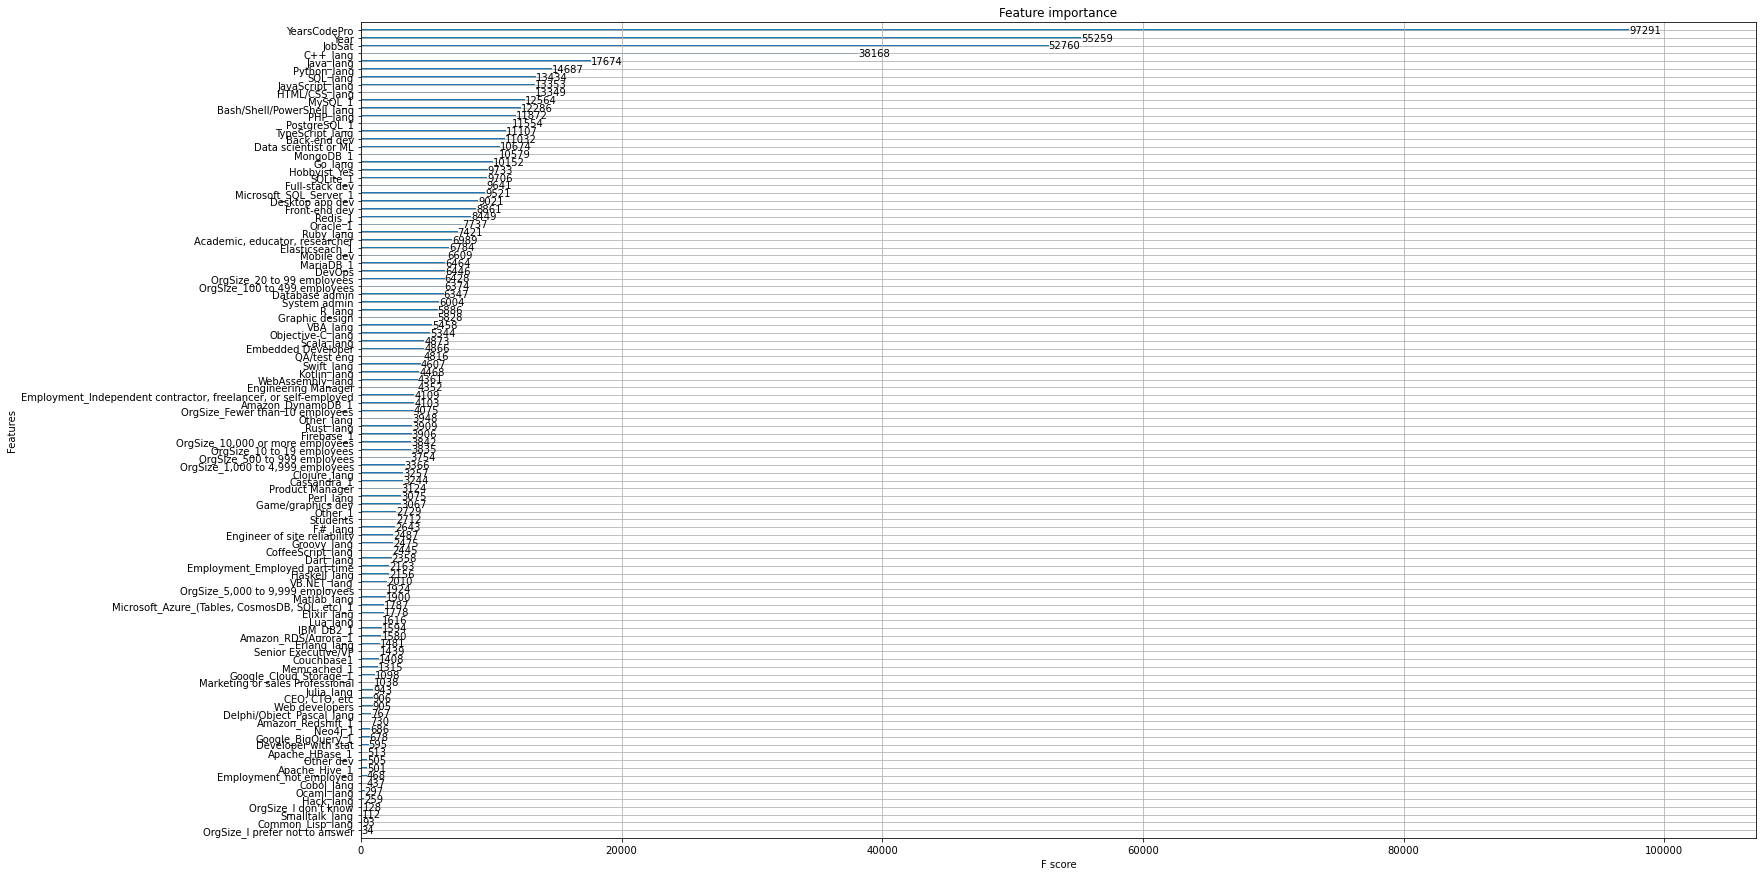

In [46]:
rcParams['figure.figsize'] = 25, 15
xgb.plot_importance(xg_reg)

In [47]:
Pkl_Filename = "XGBoost_Best_Model.pkl"  
with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(xgb.XGBRegressor, file)